 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [110]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [111]:
# Reading whale returns
aapl = Path("Resources/aapl_historical.csv")
algo = Path("Resources/algo_returns.csv")
cost = Path("Resources/cost_historical.csv")
goog = Path("Resources/goog_historical.csv")
sp500 = Path("Resources/sp500_history.csv")
whale = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale)
whale_df.head()



,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [112]:
# Count nulls
whale_df.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [113]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [114]:
## Index date
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223


In [115]:
## Drop extra date column
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [116]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [117]:
# Count nulls
algo_df.isnull()

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [118]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [119]:
## Index date
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [120]:
## Drop extra date column
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [121]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [122]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [123]:
# Fix Data Types
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df['Close'] = sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float) 
sp500_df.head()


,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06


In [124]:
## Check Data Types
sp500_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [125]:
## Index date
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df


,Date,Close
Date,,
2019-04-23,2019-04-23,2933.68
2019-04-22,2019-04-22,2907.97
2019-04-18,2019-04-18,2905.03
2019-04-17,2019-04-17,2900.45
2019-04-16,2019-04-16,2907.06
...,...,...
2012-10-05,2012-10-05,1460.93
2012-10-04,2012-10-04,1461.40
2012-10-03,2012-10-03,1450.99


In [126]:
## Drop extra date column
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [127]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [128]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [129]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500"]
sp500_returns.columns = columns
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [130]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_combined = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
returns_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

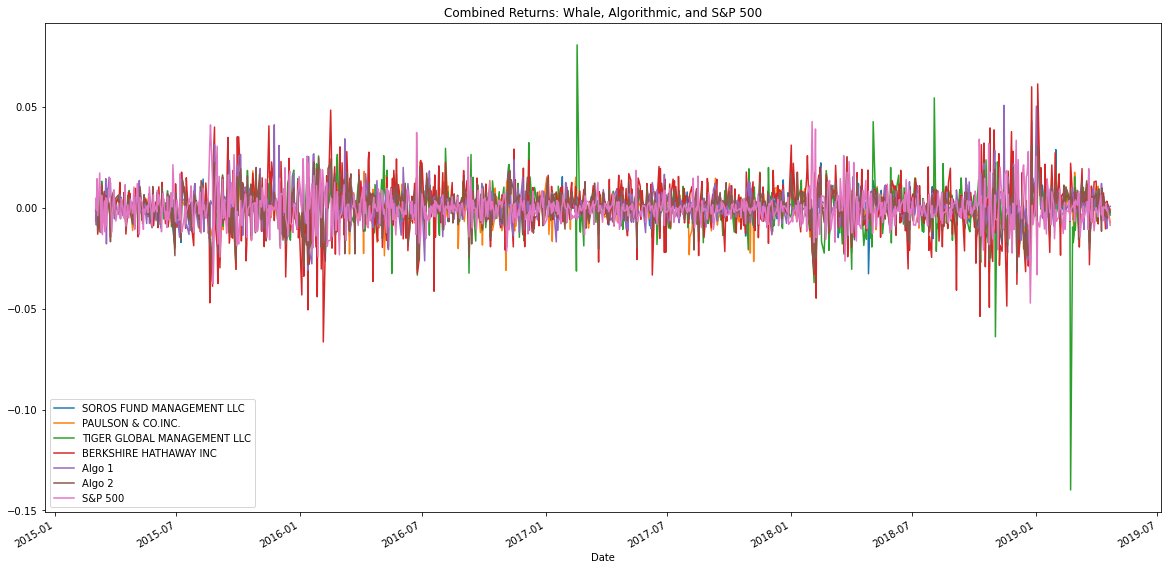

In [131]:
# Plot daily returns of all portfolios
returns_combined.plot(figsize=(20, 10), title='Combined Returns: Whale, Algorithmic, and S&P 500');

#### Calculate and Plot cumulative returns.

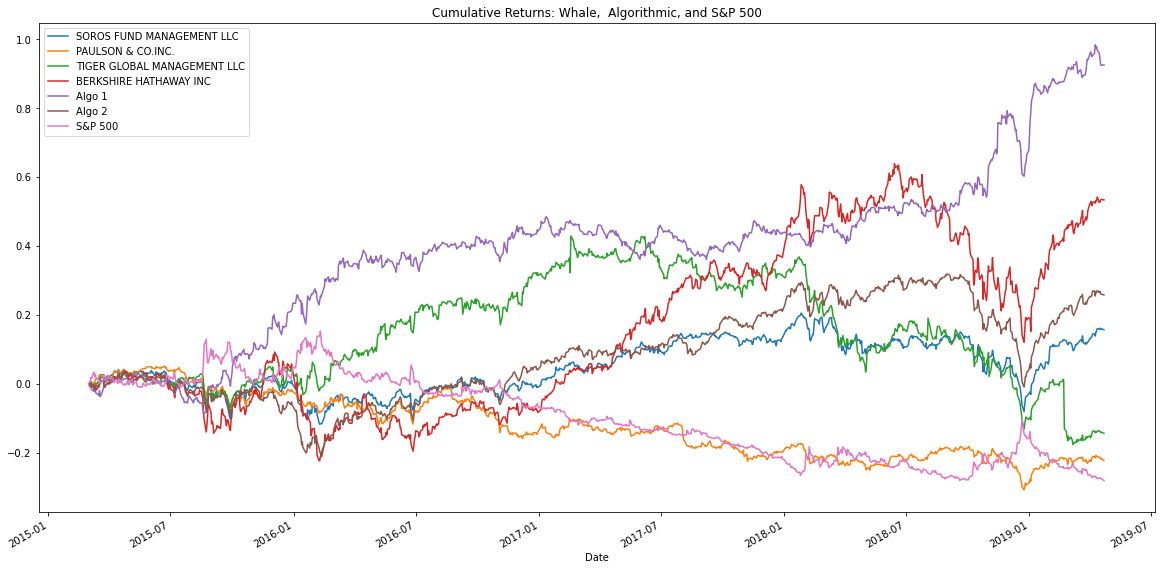

In [132]:
# Calculate cumulative returns of all portfolios
cumul_returns = (1 + returns_combined).cumprod() - 1
cumul_returns
# Plot cumulative returns
cumul_returns.plot(figsize=(20, 10), title='Cumulative Returns: Whale,  Algorithmic, and S&P 500');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


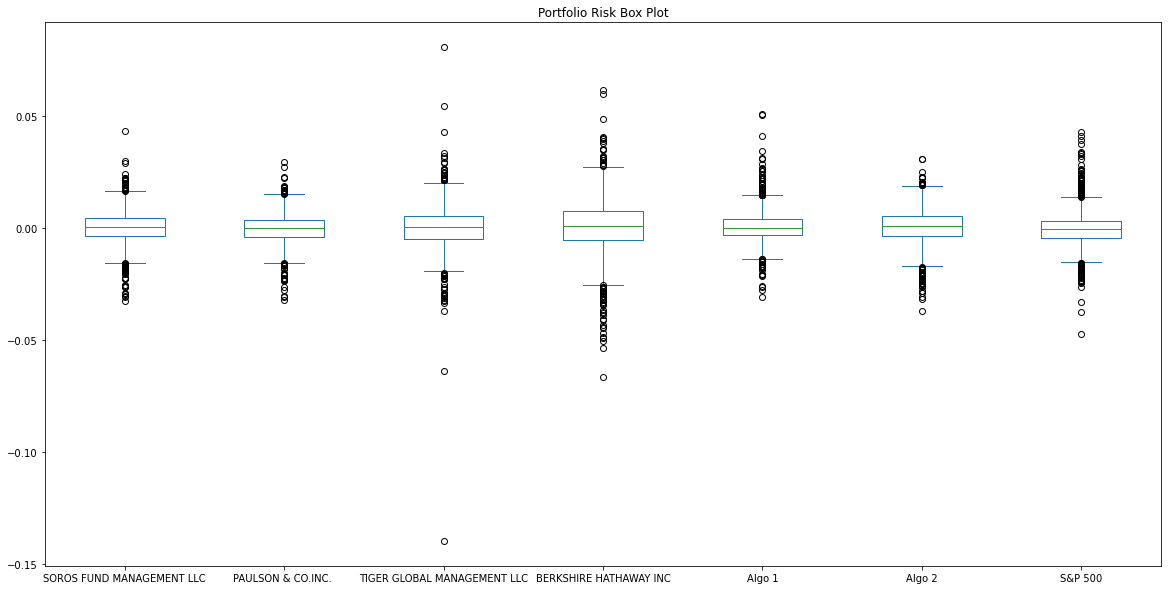

In [133]:
# Box plot to visually show risk
## Whale box plot
returns_combined.plot.box(figsize=(20, 10), title='Portfolio Risk Box Plot');

### Calculate Standard Deviations

In [134]:
# Calculate the daily standard deviations of all portfolios and S&P500
portfolios_std = returns_combined.std()
portfolios_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [135]:
# Calculate the daily standard deviations of the S&P500
sp500_std = sp500_returns.std()
sp500_std.head()

S&P 500    0.008135
dtype: float64

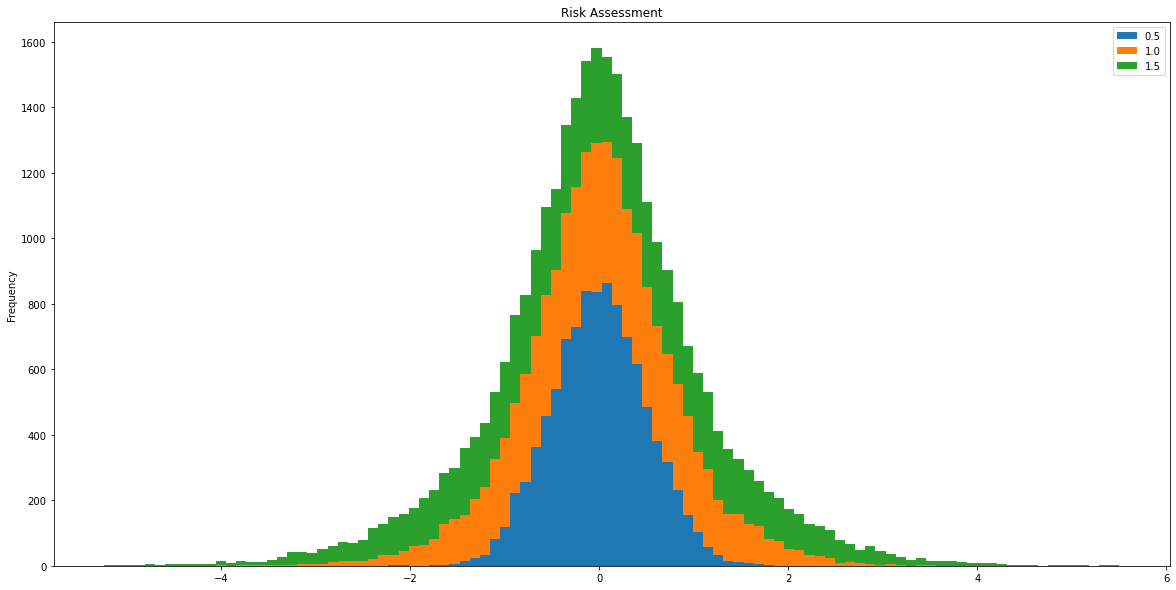

In [136]:
# Determine which portfolios are riskier than the S&P 500
whale_std = np.random.normal(scale=0.5, size=10000)
algo_std = np.random.normal(scale=1.0, size=10000)
sp500_std = np.random.normal(scale=1.5, size=10000)

all_portfolios_std = pd.DataFrame({
    "0.5": whale_std,
    "1.0": algo_std,
    "1.5": sp500_std
})

all_portfolios_std.plot.hist(figsize=(20, 10), stacked=True, bins=100, title='Risk Assessment');

### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolios_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

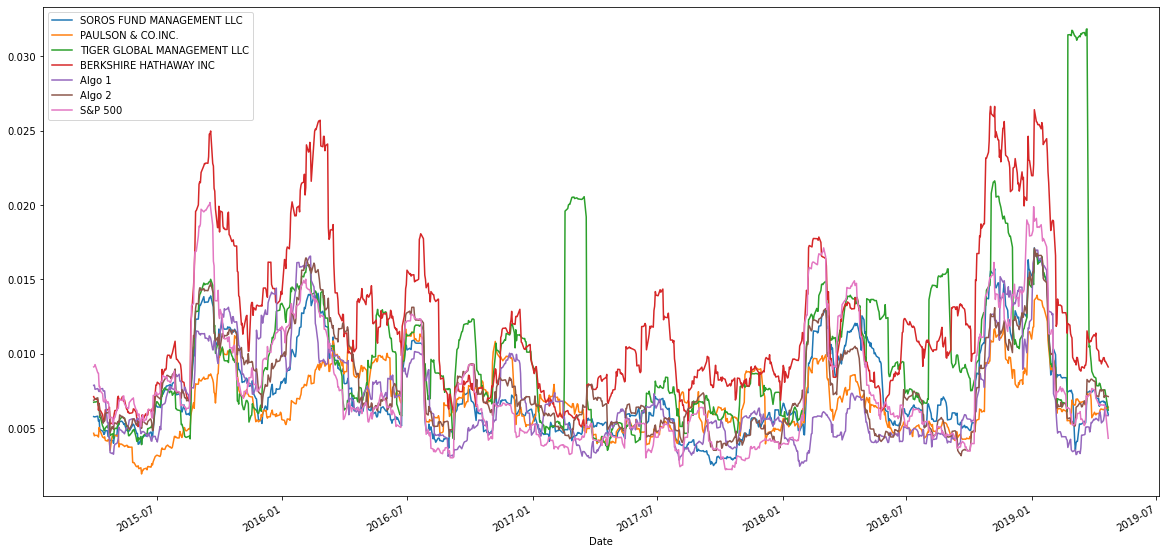

In [138]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
returns_combined.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

In [139]:
import seaborn as sns

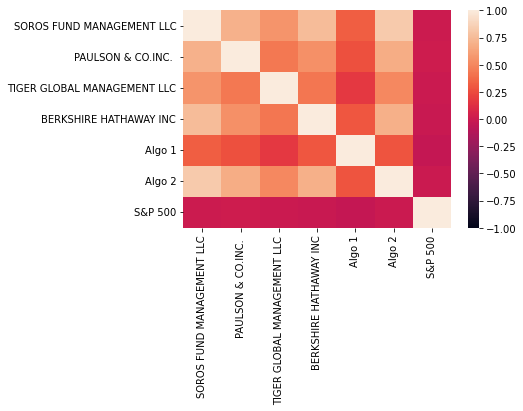

In [140]:
# Calculate the correlation
correlation = returns_combined.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [141]:
# Calculate covariance of a single portfolio
covariance = algo_df['Algo 1'].cov(algo_df['Algo 1'])
covariance

6.380355548579458e-05

In [142]:
# Calculate variance of S&P 500
variance = sp500_returns['S&P 500'].var()
variance

6.617241051948298e-05

In [143]:
# Computing beta
algo_1_beta = covariance / variance
algo_1_beta

0.9642017720815695

In [248]:
# Plot beta trend
algo_1_beta.plot(figsize=(20, 10), title='Algo and S&P 500 Beta Trend')

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [249]:
# Use `ewm` to calculate the rolling window
returns_combined.ewm(halflife=(21))

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [250]:
# Annualized Sharpe Ratios
sharpe_ratios = ((returns_combined.mean()-returns_combined['S&P 500'].mean()) * 252) / (returns_combined.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

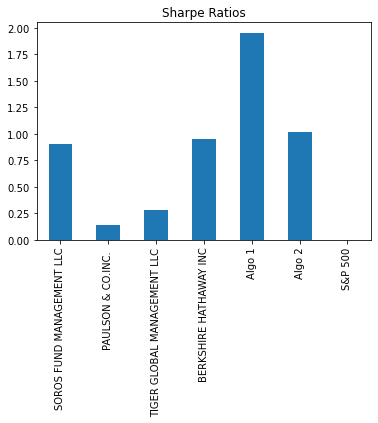

In [251]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [214]:
#3 Reading data from S&P 500
sp500 = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500)

In [215]:
# Reading data from 1st stock
goog = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog)

In [216]:
# Reading data from 2nd stock
aapl = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl)

In [217]:
# Reading data from 3rd stock
cost = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost)

In [218]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([goog_df, aapl_df, cost_df], axis="rows", join="inner")
all_stocks.head(10)

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
5,GOOG,5/2/2019,1162.61
6,GOOG,5/1/2019,1168.08
7,GOOG,4/30/2019,1188.48
8,GOOG,4/29/2019,1287.58
9,GOOG,4/26/2019,1272.18


In [219]:
# Reset Date index
all_stocks.reset_index(drop=True)

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
745,COST,5/17/2018,199.60
746,COST,5/16/2018,198.71
747,COST,5/15/2018,195.48
748,COST,5/14/2018,195.88


In [220]:
# Reorganize portfolio data by having a column per symbol
all_stocks2 = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

In [221]:
# Calculate daily returns
daily_returns = all_stocks2.pct_change()
daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,NaN,NaN,NaN
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
...,...,...,...
9/28/2018,0.003512,0.003761,-0.000979
9/4/2018,0.011606,-0.000851,0.002958
9/5/2018,-0.006525,0.003963,-0.008789


In [222]:
# Drop NAs
daily_returns.dropna(inplace=True)
daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261
...,...,...,...
9/28/2018,0.003512,0.003761,-0.000979
9/4/2018,0.011606,-0.000851,0.002958
9/5/2018,-0.006525,0.003963,-0.008789


In [223]:
# Display sample data
daily_returns.sample()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
3/11/2019,0.022461,0.04671,0.030474


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [224]:
# Set weights
intitial_investment = 10000
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_daily_returns = daily_returns.dot(weights)
cumulative_weighted_returns = (1 + weighted_daily_returns).cumprod()
# Display sample data
cumulative_weighted_returns.sample

<bound method NDFrame.sample of Trade DATE
1/11/2019    0.992429
1/14/2019    0.981171
1/15/2019    1.001203
1/16/2019    1.005120
1/17/2019    1.011917
               ...   
9/28/2018    1.293427
9/4/2018     1.299339
9/5/2018     1.294423
9/6/2018     1.283743
9/7/2018     1.286518
Length: 249, dtype: float64>

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([daily_returns, weighted_daily_returns], axis="columns", join="inner")
joined_df.head()

,AAPL,COST,GOOG,0
Trade DATE,,,,
1/11/2019,-0.009818,-0.000617,-0.012277,-0.007571
1/14/2019,-0.015037,-0.007173,-0.011824,-0.011345
1/15/2019,0.020467,0.009713,0.031071,0.020417
1/16/2019,0.012217,-0.004028,0.003546,0.003912
1/17/2019,0.005938,0.006090,0.008261,0.006763


In [226]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna()

,AAPL,COST,GOOG,0
Trade DATE,,,,
1/11/2019,-0.009818,-0.000617,-0.012277,-0.007571
1/14/2019,-0.015037,-0.007173,-0.011824,-0.011345
1/15/2019,0.020467,0.009713,0.031071,0.020417
1/16/2019,0.012217,-0.004028,0.003546,0.003912
1/17/2019,0.005938,0.006090,0.008261,0.006763
...,...,...,...,...
9/28/2018,0.003512,0.003761,-0.000979,0.002098
9/4/2018,0.011606,-0.000851,0.002958,0.004571
9/5/2018,-0.006525,0.003963,-0.008789,-0.003784


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [227]:
# Calculate the annualized `std`
joined_std = joined_df * np.sqrt(252)
joined_std.head(7)

,AAPL,COST,GOOG,0
Trade DATE,,,,
1/11/2019,-0.155855,-0.009797,-0.194885,-0.120179
1/14/2019,-0.238707,-0.113869,-0.187697,-0.180091
1/15/2019,0.324898,0.154188,0.493243,0.324110
1/16/2019,0.193933,-0.063940,0.056297,0.062097
1/17/2019,0.094259,0.096676,0.131141,0.107359
1/18/2019,0.097777,0.159901,0.121764,0.126481
1/2/2019,0.111350,-0.656266,-0.757546,-0.434154


In [235]:
## Rename Column Including S&P500
joined_df.columns = ['AAPL', 'COST', 'GOOG', 'WEIGHTED']
joined_df.head()

,AAPL,COST,GOOG,WEIGHTED
Trade DATE,,,,
1/11/2019,-0.009818,-0.000617,-0.012277,-0.007571
1/14/2019,-0.015037,-0.007173,-0.011824,-0.011345
1/15/2019,0.020467,0.009713,0.031071,0.020417
1/16/2019,0.012217,-0.004028,0.003546,0.003912
1/17/2019,0.005938,0.006090,0.008261,0.006763


### Calculate and plot rolling `std` with 21-day window

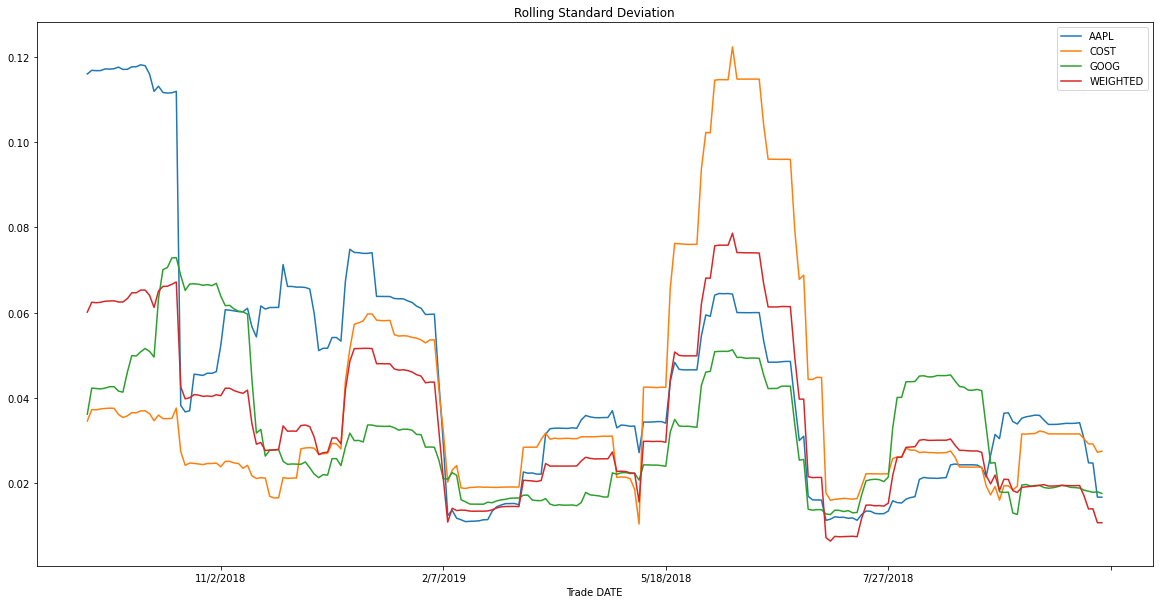

In [236]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
joined_df.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling Standard Deviation');

### Calculate and plot the correlation

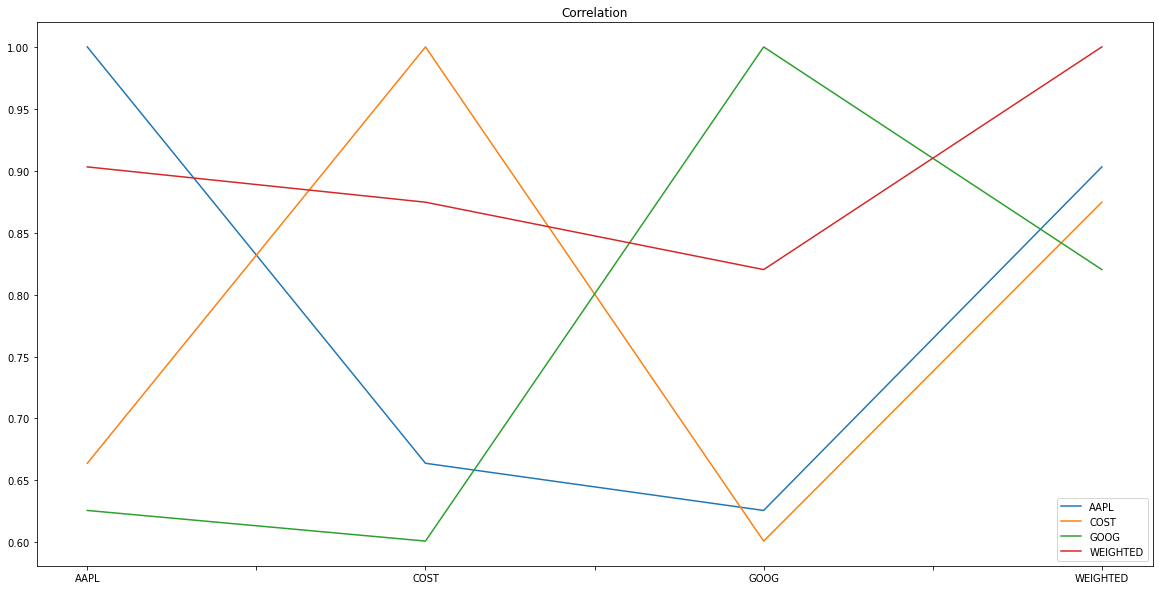

In [237]:
# Calculate and plot the correlation
joined_correlation = joined_df.corr().plot(figsize=(20, 10), title='Correlation')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [247]:
# Calculate and plot Beta
joined_df = daily_returns[].rolling(window=60).var()
joined_df.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')

KeyError: 'NOCP'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [246]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = ((daily_returns.mean()-daily_returns[sp500_df].mean()) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios2

Symbol
AAPL   NaN
COST   NaN
GOOG   NaN
dtype: float64

In [253]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")

NameError: name 'sharpe_ratios2' is not defined

### How does your portfolio do?

Write your answer here!

In [ ]:
# From line 141 down I am confused with how to incorporate the 'S&P 500' data in to the code.
# I am struggling to understand where the data comes from as well.
# I believe lines 110-140 look correct and much of the other code looks very close! But clearly something is off.
# Unfortunetly I will not have acesss to this computer to practice over the weekend so i am turning it in tonight.
# I am hoping to run trial and error and potentially resubmit, if possible, after i have received some aide.
